In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

set.seed(21)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "missed-tackles-bdb"     "nfl-big-data-bowl-2024" "tackles-data"

In [56]:
names(full_plays)
full_plays <- full_plays %>% 
select(-c('tacklerId','tackle', 'assist', 'forcedFumble', 'pff_missedTackle', 'height', 'weight',  'position'))

[1] "gameId"                           "playId"                          
 [3] "ballCarrierId"                    "ballCarrierDisplayName"          
 [5] "playDescription"                  "quarter"                         
 [7] "down"                             "yardsToGo"                       
 [9] "possessionTeam"                   "defensiveTeam"                   
[11] "yardlineSide"                     "yardlineNumber"                  
[13] "gameClock"                        "preSnapHomeScore"                
[15] "preSnapVisitorScore"              "passResult"                      
[17] "passLength"                       "penaltyYards"                    
[19] "prePenaltyPlayResult"             "playResult"                      
[21] "playNullifiedByPenalty"           "absoluteYardlineNumber"          
[23] "offenseFormation"                 "defendersInTheBox"               
[25] "passProbability"                  "preSnapHomeTeamWinProbability"   
[27] "preSnapVisitorTeamWinProbability" "homeTeamWinProbabilityAdded"     
[29] "visitorTeamWinProbilityAdded"     "expectedPoints"                  
[31] "expectedPointsAdded"              "foulName1"                       
[33] "foulName2"                        "foulNFLId1"                      
[35] "foulNFLId2"                       "season"                          
[37] "week"                             "gameDate"                        
[39] "gameTimeEastern"                  "homeTeamAbbr"                    
[41] "visitorTeamAbbr"                  "homeFinalScore"                  
[43] "visitorFinalScore"                "tacklerId"                       
[45] "tackle"                           "assist"                          
[47] "forcedFumble"                     "pff_missedTackle"                
[49] "height"                           "weight"                          
[51] "position"

In [58]:
length(full_plays$playId)
full_plays <- full_plays %>%
    distinct()
length(full_plays$playId)

[1] 17887

[1] 12486

In [140]:
###IMPORTING ALL NON-TRACKING DATA

games_df <- read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')

players_df <- read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')

plays_df <- read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')

tackles_df <- read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')

print("games_df has the columns:")
print(colnames(games_df))
print(" ")

print("players_df has the columns:")
print(colnames(players_df))
print(" ")

print("plays_df has the columns:")
print(colnames(plays_df))
print(" ")

print("tackles_df has the columns:")
print(colnames(tackles_df))

Rows: 136 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): gameDate, homeTeamAbbr, visitorTeamAbbr
dbl  (5): gameId, season, week, homeFinalScore, visitorFinalScore
time (1): gameTimeEastern

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1683 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): height, birthDate, collegeName, position, displayName
dbl (2): nflId, weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12486 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): ballCarrierDisplayName, playDescription, possessionTeam, defensiv...
dbl  (24): gameId, playId, 

[1] "games_df has the columns:"
[1] "gameId"            "season"            "week"             
[4] "gameDate"          "gameTimeEastern"   "homeTeamAbbr"     
[7] "visitorTeamAbbr"   "homeFinalScore"    "visitorFinalScore"
[1] " "
[1] "players_df has the columns:"
[1] "nflId"       "height"      "weight"      "birthDate"   "collegeName"
[6] "position"    "displayName"
[1] " "
[1] "plays_df has the columns:"
 [1] "gameId"                           "playId"                          
 [3] "ballCarrierId"                    "ballCarrierDisplayName"          
 [5] "playDescription"                  "quarter"                         
 [7] "down"                             "yardsToGo"                       
 [9] "possessionTeam"                   "defensiveTeam"                   
[11] "yardlineSide"                     "yardlineNumber"                  
[13] "gameClock"                        "preSnapHomeScore"                
[15] "preSnapVisitorScore"              "passResult"           

In [145]:
full_plays <- left_join(plays_df, games_df, by = "gameId")
full_plays <- left_join(full_plays, tackles_df, by = c('gameId', 'playId'))
full_plays <- left_join(full_plays, players_df, by = c('nflId'))

columns_to_factor <- c("gameId", "playId", "ballCarrierId", 'nflId', "week", "season", "foulNFLId1", "foulNFLId2")
full_plays[columns_to_factor] <- lapply(full_plays[columns_to_factor], as.factor)

full_plays <- full_plays %>% 
  rename(
    tacklerId = nflId,
    )


numeric_data <- full_plays %>% select_if(is.numeric)



In [54]:
missed_tackles <- full_plays[full_plays$pff_missedTackle == 1,]
missed_tackles <- missed_tackles %>%
  rename(nflId_miss = nflId)
tackles <- full_plays[full_plays$tackle == 1,]
tackles <- tackles %>%
  rename(nflId_tackler = nflId)
assists <- full_plays[full_plays$assist == 1,]
tackles <- tackles %>%
  rename(nflId_assist = nflId)

In [14]:
rm(full_plays)

In [31]:
assists <- assists %>%
  mutate(playCode = paste(gameId, playId, sep = "_"))
playcodes <- assists$playCode

In [16]:
missed_tackles <- missed_tackles %>%
  mutate(tackleCode = paste(gameId, playId, tacklerId, sep = "_"),
        carrierCode = paste(gameId, playId, ballCarrierId, sep = "_"),
        fullCode = paste(gameId, playId, ballCarrierId, tacklerId, sep = "_"))


carrier_codes <- missed_tackles$carrierCode
tackler_codes <- missed_tackles$tackleCode
codes <- union(missed_tackles$tackleCode, missed_tackles$carrierCode)

In [18]:
unique_play_missed <- unique(missed_tackles$playId)
week_links <- c('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv')

carrier_data <- data.frame()

for (link in week_links){
    week <- read_csv(link)
    
    missed_plays <- week[week$playId %in% unique_play_missed, ]
    
    missed_plays$playId <- as.factor(missed_plays$playId)
    missed_plays$nflId <- as.factor(missed_plays$nflId)
    
    missed_plays <- missed_plays %>%
          mutate(code = paste(gameId, playId, nflId, sep = "_"))
    
    # Filter using dplyr for improved performance
    filtered_rows <- missed_plays %>%
        filter(code %in% carrier_codes & 
               displayName != 'football')
    
    # Append filtered rows to the result DataFrame
    carrier_data <- bind_rows(carrier_data, filtered_rows)
    
    rm(week)
}

carrier_data <- carrier_data %>%
  rename(
    x_carrier = x,
    y_carrier = y,
    o_carrier = o,
    dir_carrier = dir,
    s_carrier = s,
    a_carrier = a,
    dis_carrier = dis,
    nflId_carrier = nflId
  )


tackler_data <- data.frame()

for (link in week_links){
    week <- read_csv(link)
    
    missed_plays <- week[week$playId %in% unique_play_missed, ]
    
    missed_plays$playId <- as.factor(missed_plays$playId)
    missed_plays$nflId <- as.factor(missed_plays$nflId)
    
    missed_plays <- missed_plays %>%
          mutate(tcode = paste(gameId, playId, nflId, sep = "_"))
    
    # Filter using dplyr for improved performance
    filtered_rows <- missed_plays %>%
        filter(tcode %in% tackler_codes & 
               displayName != "football") # |displayName == 'football'
    
    # Append filtered rows to the result DataFrame
    tackler_data <- bind_rows(tackler_data, filtered_rows)
    
    rm(week)
}

tackler_data <- tackler_data %>%
  rename(
    x_tackler = x,
    y_tackler = y,
    o_tackler = o,
    dir_tackler = dir,
    s_tackler = s,
    a_tackler = a,
    dis_tackler = dis,
    nlfId_tackler = nflId
  )

Rows: 1407439 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, playDirection, event
dbl  (12): gameId, playId, nflId, frameId, jerseyNumber, x, y, s, a, dis, o,...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1371600 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, playDirection, event
dbl  (12): gameId, playId, nflId, frameId, jerseyNumber, x, y, s, a, dis, o,...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1415788 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, 

In [18]:
missed_tackle_frames <- left_join(carrier_data, tackler_data, by = c("gameId", "playId", "frameId", "time", "event",  "playDirection"))

missed_tackle_frames$tack_carr_dist <- sqrt((missed_tackle_frames$x_carrier-missed_tackle_frames$x_tackler)^2 +(missed_tackle_frames$y_carrier-missed_tackle_frames$y_tackler)^2)

missed_tackle_frames <- missed_tackle_frames %>% arrange(tcode)


In [19]:
write_csv(missed_tackle_frames, "missed_tackles.csv")

In [32]:
closest_frame_data <- your_data %>%
  group_by(tcode) %>%
  filter(row_number() == which.min(tack_carr_dist) - 3) %>%
  ungroup()

In [34]:
write.csv(closest_frame_data, 'closest_frames.csv')

In [14]:
#repeat work, but for tackles instead of missed tackles
tackles <- tackles %>%
  mutate(tackleCode = paste(gameId, playId, tacklerId, sep = "_"),
        carrierCode = paste(gameId, playId, ballCarrierId, sep = "_"),
        fullCode = paste(gameId, playId, ballCarrierId, tacklerId, sep = "_"))


carrier_codes <- tackles$carrierCode
tackler_codes <- tackles$tackleCode
codes <- union(tackles$tackleCode, tackles$carrierCode)


unique_tackles <- unique(tackles$playId)
week_links <- c('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv', 
                '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv')

carrier_data <- data.frame()

for (link in week_links){
    week <- read_csv(link)
    
    missed_plays <- week[week$playId %in% unique_tackles, ]
    
    missed_plays$playId <- as.factor(missed_plays$playId)
    missed_plays$nflId <- as.factor(missed_plays$nflId)
    
    missed_plays <- missed_plays %>%
          mutate(code = paste(gameId, playId, nflId, sep = "_"))
    
    # Filter using dplyr for improved performance
    filtered_rows <- missed_plays %>%
        filter(code %in% carrier_codes & 
               displayName != 'football') #%>%
        #group_by(code) %>%
        #filter(row_number() == which(event %in% c("tackle", "touchdown", "qb_slide", "qb_sack")) - 3) %>%
        #ungroup()
    
    
    # Append filtered rows to the result DataFrame
    carrier_data <- bind_rows(carrier_data, filtered_rows)
    
    rm(week)
}

carrier_data <- carrier_data %>%
  rename(
    x_carrier = x,
    y_carrier = y,
    o_carrier = o,
    dir_carrier = dir,
    s_carrier = s,
    a_carrier = a,
    dis_carrier = dis,
    nflId_carrier = nflId
  )


tackler_data <- data.frame()

for (link in week_links){
    week <- read_csv(link)
    
    missed_plays <- week[week$playId %in% unique_tackles, ]
    
    missed_plays$playId <- as.factor(missed_plays$playId)
    missed_plays$nflId <- as.factor(missed_plays$nflId)
    
    missed_plays <- missed_plays %>%
          mutate(tcode = paste(gameId, playId, nflId, sep = "_"))
    
    # Filter using dplyr for improved performance
    filtered_rows <- missed_plays %>%
        filter(tcode %in% tackler_codes & 
               displayName != "football") #%>%
        #group_by(tcode) %>%
        #      filter(row_number() == which(event %in% c("tackle", "touchdown", "qb_slide", "qb_sack")) - 3) %>%
        #      ungroup()# |displayName == 'football'
    
    # Append filtered rows to the result DataFrame
    tackler_data <- bind_rows(tackler_data, filtered_rows)
    
    rm(week)
}

tackler_data <- tackler_data %>%
  rename(
    x_tackler = x,
    y_tackler = y,
    o_tackler = o,
    dir_tackler = dir,
    s_tackler = s,
    a_tackler = a,
    dis_tackler = dis,
    nlfId_tackler = nflId
  )

tackle_frames <- left_join(carrier_data, tackler_data, by = c("gameId", "playId", "frameId", "time", "event",  "playDirection"))

tackle_frames$tack_carr_dist <- sqrt((tackle_frames$x_carrier-tackle_frames$x_tackler)^2 +(tackle_frames$y_carrier-tackle_frames$y_tackler)^2)

tackle_frames <- missed_tackle_frames %>% arrange(tcode)


Rows: 1407439 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, playDirection, event
dbl  (12): gameId, playId, nflId, frameId, jerseyNumber, x, y, s, a, dis, o,...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1371600 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, playDirection, event
dbl  (12): gameId, playId, nflId, frameId, jerseyNumber, x, y, s, a, dis, o,...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1415788 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, 

ERROR: Error in arrange(., tcode): object 'missed_tackle_frames' not found


In [23]:
closest_frame_data <- tackle_frames %>%
  group_by(tcode) %>%
  filter(row_number() == min(which(event %in% c("tackle", "touchdown", "qb_slide", "qb_sack")))) %>%
  ungroup()

Warning message:
“There were 1691 warnings in `filter()`.
The first warning was:
ℹ In argument: `==...`.
ℹ In group 8: `tcode = "2022090800_1286_44976"`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1690 remaining warnings.”


In [25]:
closest_frame_data <- closest_frame_data %>%
    mutate(tackleOccured = 1)


In [26]:
write.csv(closest_frame_data, "tackles_at_tackle_frame.csv")

In [21]:
threeFramesMissed <- read_csv('/kaggle/input/missed-tackles-bdb/3frames.csv')
threeFramesMissed <- threeFramesMissed %>%
    mutate(tackleOccured = 0) %>%
    distinct()

atTackleMissed <- read_csv('/kaggle/input/missed-tackles-bdb/closest_frames.csv')
atTackleMissed <- atTackleMissed %>%
    mutate(tackleOccured = 0) %>%
    distinct()

newcolsmiss <- paste0(colnames(threeFramesMissed), "_3")

# Rename the columns
colnames(threeFramesMissed) <- newcolsmiss

atTackle <- read_csv('/kaggle/input/tackles-data/tackles_at_tackle_frame.csv')
atTackle <- atTackle %>%
    mutate(tackleOccured = 1) %>%
    distinct()

threeFramesTackle <- read_csv('/kaggle/input/tackles-data/tackles_3_frames.csv')
threeFramesTackle <- threeFramesTackle %>%
    mutate(tackleOccured = 1) %>%
    distinct()

newcolstackle <- paste0(colnames(threeFramesTackle), "_3")

# Rename the columns
colnames(threeFramesTackle) <- newcolstackle


tackleFinal <- atTackle %>%
  left_join(threeFramesTackle, by = c("tcode" = "tcode_3","frameId" = "frameId_3" ))

missFinal <- atTackleMissed %>%
    left_join(threeFramesMissed, by = c("tcode" = "tcode_3","frameId" = "frameId_3" ))


New names:
• `` -> `...1`
Rows: 2035 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): displayName.x, club.x, playDirection, event, code, displayName.y,...
dbl  (25): ...1, gameId, playId, nflId_carrier, frameId, jerseyNumber.x, x_c...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 2090 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): displayName.x, club.x, playDirection, event, code, displayName.y,...
dbl  (25): ...1, gameId, playId, nflId_carrier, frameId, jerseyNumber.x, x_c...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 8228 Columns: 33

In [25]:
columns_in_df1_not_in_df2 <- setdiff(names(tackleFinal), names(missFinal))

# List of columns in df2 not present in df1
columns_in_df2_not_in_df1 <- setdiff(names(missFinal), names(tackleFinal))

# Print the lists of differences
print("Columns in df1 not in df2:")
print(columns_in_df1_not_in_df2)

print("Columns in df2 not in df1:")
print(columns_in_df2_not_in_df1)


[1] "Columns in df1 not in df2:"
character(0)
[1] "Columns in df2 not in df1:"
character(0)


ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `character(0)` doesn't exist.


In [74]:

    

tackleFinal <- atTackle %>%
  left_join(threeFramesTackle, by = c("tcode" = "tcode_3"))
missFinal <- atTackleMissed %>%
    left_join(threeFramesMissed, by = c("tcode" = "tcode_3"))

In [75]:
tackleFinal

...1,gameId,playId,nflId_carrier,displayName.x,frameId,time,jerseyNumber.x,club.x,playDirection,⋯,club.y_3,x_tackler_3,y_tackler_3,s_tackler_3,a_tackler_3,dis_tackler_3,o_tackler_3,dir_tackler_3,tack_carr_dist_3,tackleOccured_3
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022090800,56,42489,Stefon Diggs,18,2022-09-08 20:24:06,14,BUF,left,⋯,LA,78.41,34.24,2.00,4.15,0.22,128.52,159.81,0.8633076,1
2,2022090800,80,46076,Josh Allen,26,2022-09-08 20:24:38,17,BUF,left,⋯,LA,73.78,40.75,5.50,2.76,0.54,354.27,335.04,0.5240229,1
3,2022090800,101,47857,Devin Singletary,45,2022-09-08 20:25:12,26,BUF,left,⋯,LA,69.31,40.24,3.55,4.01,0.36,189.49,198.63,1.1691450,1
4,2022090800,122,47857,Devin Singletary,29,2022-09-08 20:25:53,26,BUF,left,⋯,LA,61.19,47.43,3.49,5.60,0.36,254.29,307.10,0.5288667,1
5,2022090800,167,42489,Stefon Diggs,18,2022-09-08 20:27:12,14,BUF,left,⋯,LA,48.01,25.99,5.90,3.08,0.58,204.63,227.62,1.3340540,1
6,2022090800,191,52494,Zack Moss,47,2022-09-08 20:27:46,20,BUF,left,⋯,LA,44.92,41.43,1.82,3.06,0.19,232.83,336.73,0.4743416,1
7,2022090800,212,52494,Zack Moss,12,2022-09-08 20:28:26,20,BUF,left,⋯,LA,36.43,48.27,7.98,3.03,0.79,357.20,331.89,0.3478505,1
8,2022090800,299,47853,Darrell Henderson,49,2022-09-08 20:33:35,27,LA,right,⋯,BUF,31.11,30.65,2.57,3.56,0.28,283.14,27.58,1.0288343,1
9,2022090800,343,47853,Darrell Henderson,35,2022-09-08 20:34:35,27,LA,right,⋯,BUF,28.98,29.88,2.54,1.53,0.25,243.56,209.08,1.8102486,1


In [73]:
commoncol

character(0)


In [76]:
stacked_data <- bind_rows(tackleFinal, missFinal)

New names:
• `...1_3` -> `...34`
New names:
• `...1_3` -> `...36`


In [77]:
stacked_data <- stacked_data %>%
    mutate(playCode = paste(gameId, playId, sep = "_")) %>%
    mutate(assistOccured = ifelse(playCode %in% playcodes, 1, 0))

In [66]:
tackleFinal

...1,gameId,playId,nflId_carrier,displayName.x,frameId,time,jerseyNumber.x,club.x,playDirection,⋯,club.y_3,x_tackler_3,y_tackler_3,s_tackler_3,a_tackler_3,dis_tackler_3,o_tackler_3,dir_tackler_3,tack_carr_dist_3,tackleOccured_3
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022090800,56,42489,Stefon Diggs,18,2022-09-08 20:24:06,14,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2022090800,80,46076,Josh Allen,26,2022-09-08 20:24:38,17,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2022090800,101,47857,Devin Singletary,45,2022-09-08 20:25:12,26,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2022090800,122,47857,Devin Singletary,29,2022-09-08 20:25:53,26,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2022090800,167,42489,Stefon Diggs,18,2022-09-08 20:27:12,14,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2022090800,191,52494,Zack Moss,47,2022-09-08 20:27:46,20,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,2022090800,212,52494,Zack Moss,12,2022-09-08 20:28:26,20,BUF,left,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,2022090800,299,47853,Darrell Henderson,49,2022-09-08 20:33:35,27,LA,right,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,2022090800,343,47853,Darrell Henderson,35,2022-09-08 20:34:35,27,LA,right,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [47]:
commoncols <- intersect(names(full_plays), names(stacked_data))
commoncols

[1] "gameId" "playId"

In [78]:
stacked_data$gameId <- as.factor(stacked_data$gameId)
stacked_data$playId <- as.factor(stacked_data$playId)
all_data_final <- left_join(stacked_data, full_plays, by = c("gameId", "playId"))
all_data_final$tackleOccured <- factor(all_data_final$tackleOccured, levels = c(0,1), ordered = TRUE)


In [102]:
all_data_final$tackleOccured <- factor(all_data_final$tackleOccured, levels = c(0,1), ordered = TRUE)

In [95]:
write_csv(all_data_final, 'all_data_final.csv')

In [90]:
all_data_final$event_dist_los <- ifelse(all_data_final$playDirection == 'left', all_data_final$absoluteYardlineNumber - all_data_final$x_carrier, - all_data_final$absoluteYardlineNumber + all_data_final$x_carrier)

In [92]:
tackle_data_final <- all_data_final[all_data_final$tackleOccured == 1,]

miss <- ggplot(all_data_final, aes(x = event_dist_los, y = y_carrier, color = factor(tackleOccured))) +
  geom_point() +
  scale_color_manual(values = c("red", "blue"), labels = c("Missed Tackle", "Tackle Occurred")) +
  labs(color = "Tackle Occurred") +
  theme_minimal()

ggsave("make_miss.pdf", plot = miss, device = "pdf")



In [100]:
miss <- ggplot(all_data_final, aes(x = event_dist_los, y = y_carrier, color = factor(tackleOccured))) +
  geom_point() +
  scale_color_manual(values = c("red", "blue"), labels = c("Missed Tackle", "Tackle Occurred")) +
  labs(color = "Tackle Occurred") +
  theme_minimal()

ggsave("make_miss.pdf", plot = miss, device = "pdf")

Saving 12.5 x 6.67 in image


In [99]:
solo <- ggplot(tackle_data_final, aes(x = event_dist_los, y = y_carrier, color = factor(assistOccured))) +
  geom_point() +
  scale_color_manual(values = c("green", "blue"), labels = c("Solo Tackle", "Assisted Tackle")) +
  labs(color = "Tackle Occurred") +
  theme_minimal()
ggsave("solo_assisted.pdf", plot = solo, device = "pdf")

Saving 12.5 x 6.67 in image


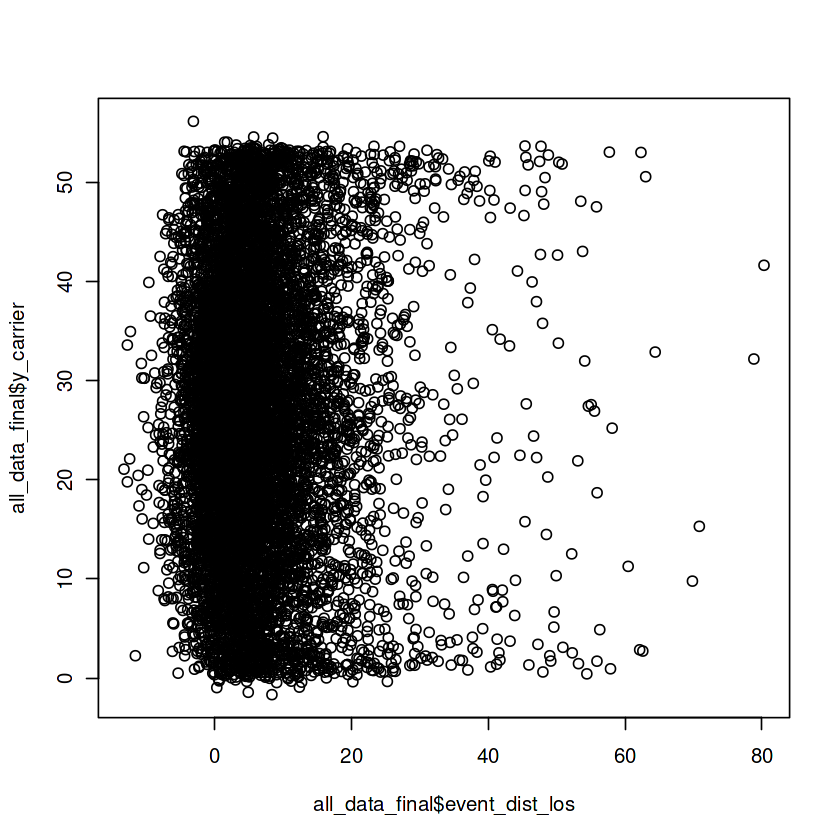

In [94]:
plot( all_data_final$event_dist_los, all_data_final$y_carrier)


In [21]:
pivoted_data

gameId,playId,frameId,time,event,playDirection,x_38542,x_39984,x_42372,x_42410,⋯,jerseyNumber_43439,jerseyNumber_42469,jerseyNumber_52666,jerseyNumber_42514,jerseyNumber_52482,jerseyNumber_48537,jerseyNumber_52721,jerseyNumber_53635,jerseyNumber_54606,jerseyNumber_55125
<dbl>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022110300,55,1,2022-11-03 20:16:30,NA,right,35.31,40.01,33.18,33.55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,2,2022-11-03 20:16:30,NA,right,35.30,40.03,33.17,33.55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,3,2022-11-03 20:16:30,NA,right,35.29,40.05,33.17,33.55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,4,2022-11-03 20:16:30,NA,right,35.31,40.07,33.17,33.55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,5,2022-11-03 20:16:30,NA,right,35.31,40.08,33.18,33.55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,6,2022-11-03 20:16:30,ball_snap,right,35.30,40.08,33.18,33.55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,7,2022-11-03 20:16:31,NA,right,35.29,40.08,33.19,33.56,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,8,2022-11-03 20:16:31,NA,right,35.26,40.07,33.19,33.57,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022110300,55,9,2022-11-03 20:16:31,NA,right,35.25,40.06,33.23,33.58,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [28]:
unique_play_missed <- unique(missed_tackles$playId)
week_links <- c('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv', '/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv')

# Initialize an empty DataFrame to store filtered results
filtered_data <- data.frame()
number_check = 1
for (link in week_links){
    
    week <- read_csv(link)
    week$playId <- as.factor(week$playId)
    week$nflId <- as.factor(week$nflId)
    missed_plays <- week[week$playId %in% unique_play_missed, ]
# Loop through each unique playId
for (i in 1: length(missed_plays$playId)) {
  # Filter the frame-by-frame DataFrame based on conditions for the current playId
  filtered_rows <- subset(missed_plays, 
                          (playId == missed_plays$playId[i]) & 
                          (nflId %in% c(missed_tackles[i, "ballCarrierId"],
                                        missed_tackles[i, "tacklerId"])) |
                          displayName == 'football')
  
  # Append filtered rows for the current playId to the result DataFrame
  filtered_data <- rbind(filtered_data, filtered_rows)
}

rm(week)
print(number_check)
print(Sys.time())
number_check = number_check + 1
}

write.csv(filtered_data, 'ball_carrier_defender_missed_tackles.csv')



Rows: 1407439 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, playDirection, event
dbl  (12): gameId, playId, nflId, frameId, jerseyNumber, x, y, s, a, dis, o,...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [1]:
write.csv(filtered_data, 'ball_carrier_defender_missed_tackles.csv')


ERROR: Error in is.data.frame(x): object 'filtered_data' not found


missed_tackles <- read_csv('')

In [11]:
current_time <- Sys.time()
print(Sys.time())

[1] "2024-01-05 01:35:53 UTC"


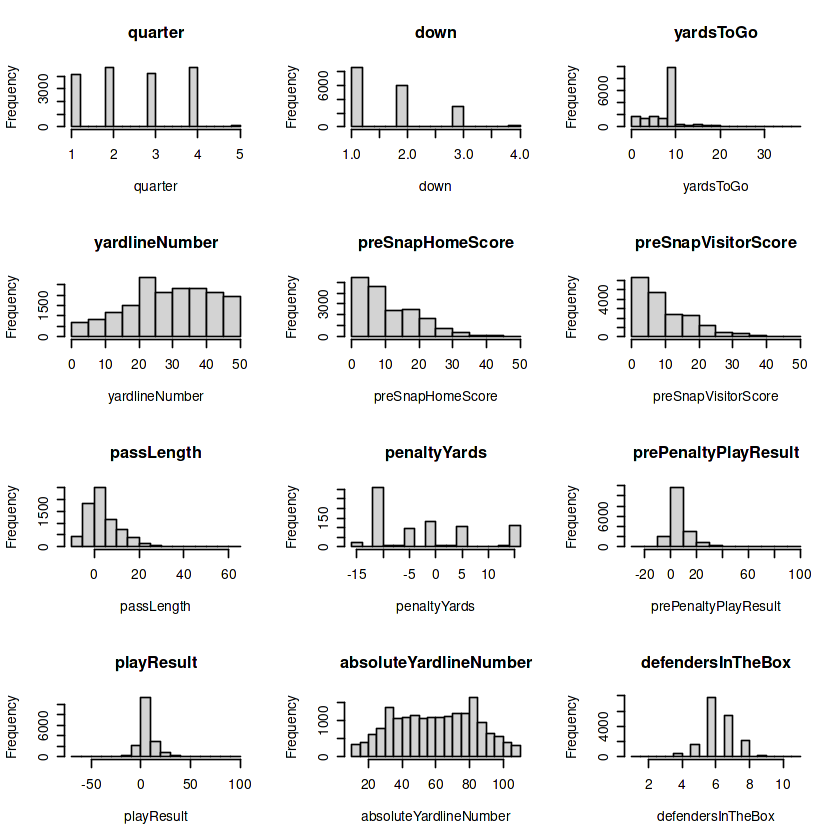

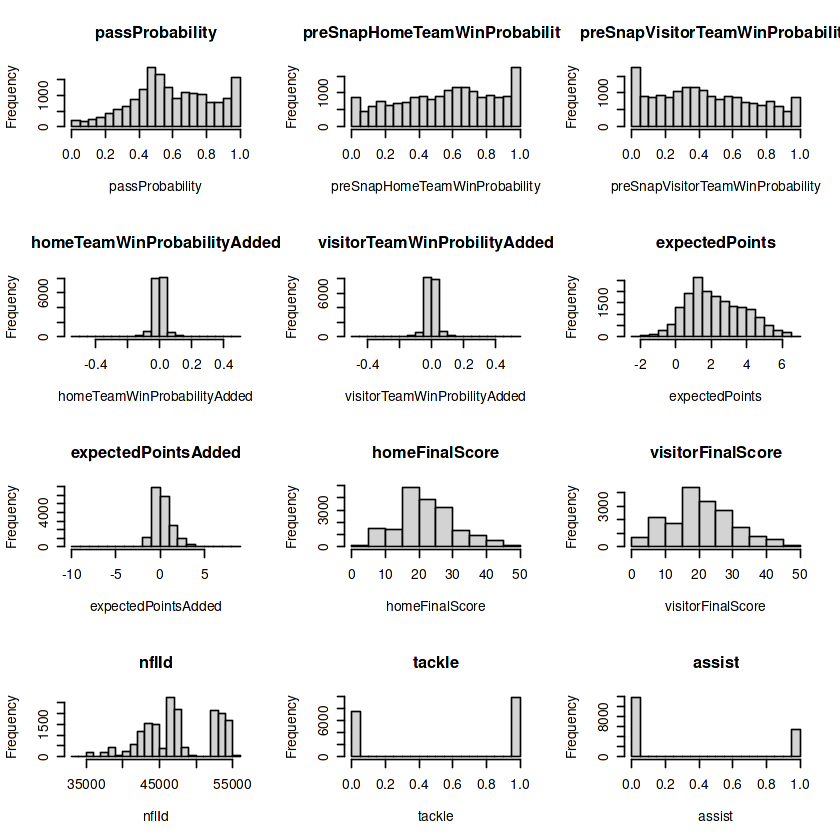

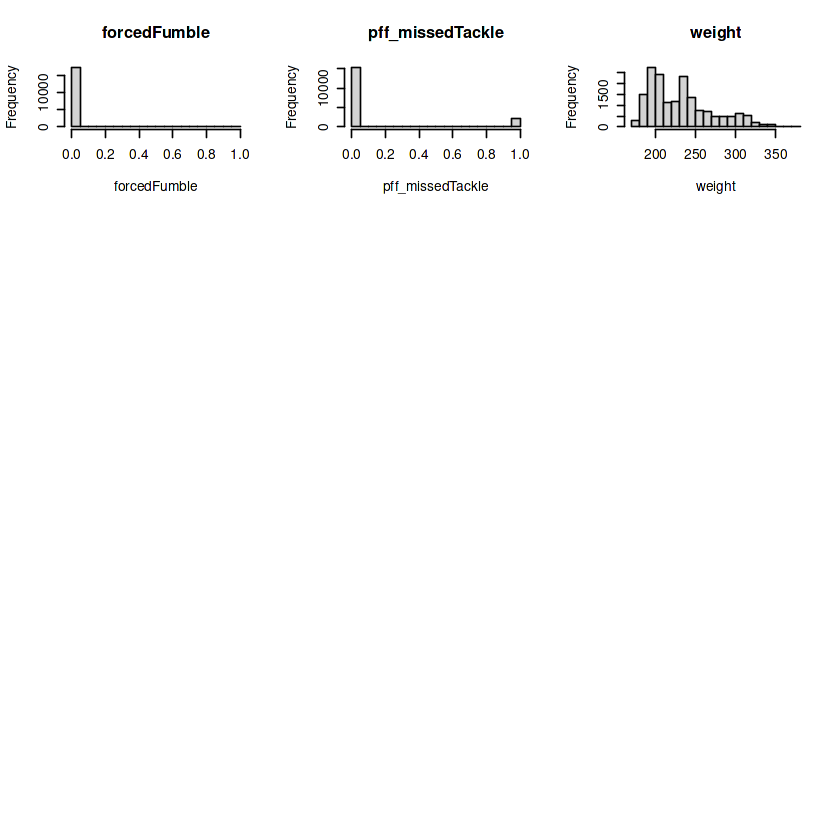

In [20]:

# Function to create individual histograms for each column
create_histograms <- function(df) {
  par(mfrow=c(4, 3))  # Setting up a grid for 4 rows and 3 columns of plots
  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      hist(df[[col]], main = col, xlab = col)
    }
  }
}

# Call the function to create histograms for numeric columns
create_histograms(numeric_data)

In [21]:
num_summary_df <- data.frame(
  Variable = character(0),
  Mean = numeric(0),
  SD = numeric(0),
  Min = numeric(0),
  Max = numeric(0),
  Median = numeric(0)
)

for (col_name in names(numeric_data)) {
  col_data <- numeric_data[[col_name]]
  num_summary_df <- rbind(num_summary_df, data.frame(
    Variable = col_name,
    Mean = mean(col_data, na.rm = TRUE),
    SD = sd(col_data, na.rm = TRUE),
    Min = min(col_data, na.rm = TRUE),
    Max = max(col_data, na.rm = TRUE),
    Median = median(col_data, na.rm = TRUE)
  ))
}

options(scipen = 999, digits = 10)

# Display the DataFrame
num_summary_df

Variable,Mean,SD,Min,Max,Median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
quarter,2.55151786213451,1.13162276003,1.000000000,5.000000000,3.000000000
down,1.70470173869291,0.78337566592,1.000000000,4.000000000,2.000000000
yardsToGo,8.52881981327221,3.91699986249,1.000000000,38.000000000,10.000000000
yardlineNumber,29.53178285905965,12.38334740430,1.000000000,50.000000000,30.000000000
preSnapHomeScore,11.21048806395706,9.43754375087,0.000000000,49.000000000,10.000000000
preSnapVisitorScore,9.79806563425952,9.06355179885,0.000000000,48.000000000,7.000000000
passLength,4.81803233762675,7.92810944749,-9.000000000,61.000000000,4.000000000
penaltyYards,-1.91504854368932,8.94875741614,-15.000000000,15.000000000,-5.000000000
prePenaltyPlayResult,7.56297869961424,8.67859775933,-26.000000000,98.000000000,5.000000000


In [2]:
week1 <- read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv')

Rows: 1407439 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): displayName, club, playDirection, event
dbl  (12): gameId, playId, nflId, frameId, jerseyNumber, x, y, s, a, dis, o,...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
colnames(week1)

[1] "gameId"        "playId"        "nflId"         "displayName"  
 [5] "frameId"       "time"          "jerseyNumber"  "club"         
 [9] "playDirection" "x"             "y"             "s"            
[13] "a"             "dis"           "o"             "dir"          
[17] "event"

STAR ANALYSIS

In [29]:
summed_data <- full_plays %>%
  group_by(displayName, nflId) %>%
  summarise(
    total_pff_missedTackle = sum(pff_missedTackle),
    total_tackle = sum(tackle),
    total_assist = sum(assist),
    total_forcedFumble = sum(forcedFumble)) %>%
  mutate(sum_values = total_pff_missedTackle + total_tackle + total_assist) %>%
  arrange(desc(sum_values))
    
head(summed_data,20)



`summarise()` has grouped output by 'displayName'. You can override using the
`.groups` argument.


displayName,nflId,total_pff_missedTackle,total_tackle,total_assist,total_forcedFumble,sum_values
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Foyesade Oluokun,46269,11,59,26,0,96
C.J. Mosley,41243,8,55,32,0,95
Zaire Franklin,46304,12,55,28,0,95
Jordyn Brooks,52435,10,61,23,1,94
Rashaan Evans,46091,6,45,39,1,90
Roquan Smith,46077,7,50,32,0,89
T.J. Edwards,48516,8,49,25,0,82
Budda Baker,44848,11,44,26,1,81
Pete Werner,53489,8,51,22,2,81


In [81]:
library(caret)
library(tidyverse)

all_data_final <- read_csv("/kaggle/input/finaldataset/all_data_final (2).csv")

set.seed(21)



New names:
• `...36` -> `...68`
Rows: 10318 Columns: 114
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (29): displayName.x, club.x, playDirection, event, code, displayName.y,...
dbl  (81): ...1, gameId, playId, nflId_carrier, frameId, jerseyNumber.x, x_c...
dttm  (2): time, time_3
time  (2): gameClock, gameTimeEastern

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [82]:
all_data_final$yardDiff <- all_data_final$playResult - all_data_final$event_dist_los

all_data_final$absoluteYardlineNumber <- ifelse(all_data_final$playDirection == 'right', all_data_final$absoluteYardlineNumber, 100-all_data_final$absoluteYardlineNumber)

all_data_final$pass  <- ifelse(is.na(all_data_final$passResult) == TRUE, 0, 1)

all_data_final$y_carrier <- ifelse(all_data_final$playDirection == 'right', 26.75 - all_data_final$y_carrier , all_data_final$y_carrier -26.75)

all_data_final$tackleOccured  <- ifelse(all_data_final$tackleOccured == 1, "MAKE", "MISS")

all_data_final$tackleOccured  <- factor(all_data_final$tackleOccured, ordered = TRUE,  levels = c("MISS", "MAKE"))


In [105]:
table(model_data$assistOccured)


   0    1 
8230 2033 

In [107]:
table(model_data$tackleOccured, model_data$assistOccured)

      
          0    1
  MISS 1439  596
  MAKE 6791 1437

str(model_data)

Warning message:
“Unknown or uninitialised column: `pass`.”


Generalized Linear Model 

8211 samples
  11 predictor
   2 classes: 'MISS', 'MAKE' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6568, 6568, 6570, 6569, 6569 
Resampling results:

  Accuracy   Kappa    
  0.8494711  0.4249074

Confusion Matrix and Statistics

          Reference
Prediction MISS MAKE
      MISS  161   65
      MAKE  246 1580
                                          
               Accuracy : 0.8484          
                 95% CI : (0.8322, 0.8637)
    No Information Rate : 0.8017          
    P-Value [Acc > NIR] : 2.425e-08       
                                          
                  Kappa : 0.4276          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.39558         
            Specificity : 0.96049         
         Pos Pred Value : 0.71239         
         Neg Pred Value : 0.86528         
             Prev

Setting levels: control = MISS, case = MAKE

Warning message in value[[3L]](cond):
“Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor.”
Setting direction: controls < cases



[1] "F1 Score: 0.5086887835703"


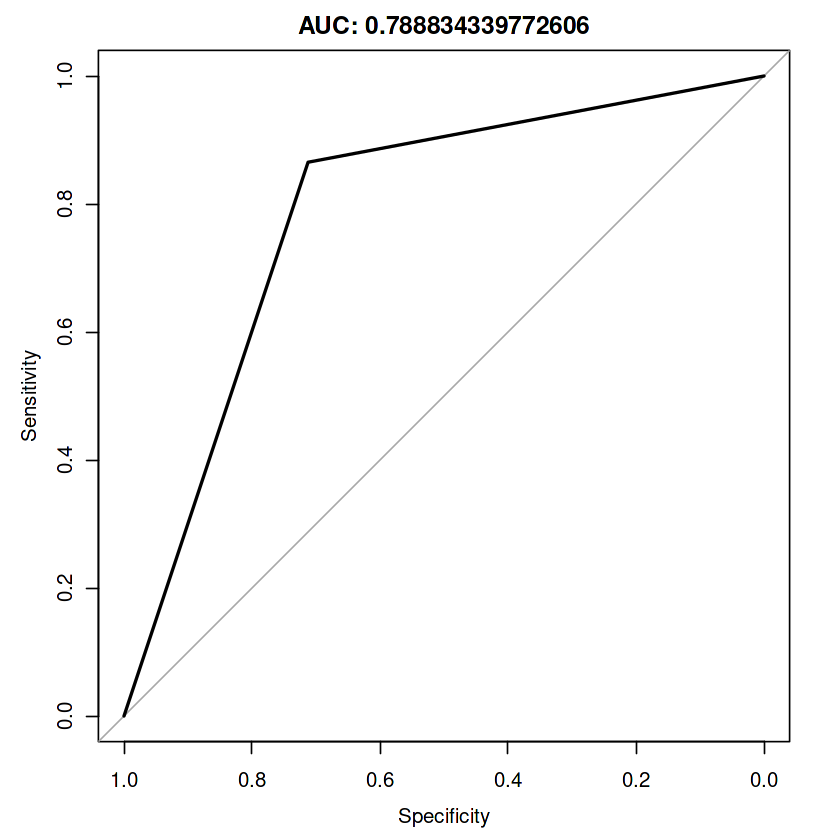

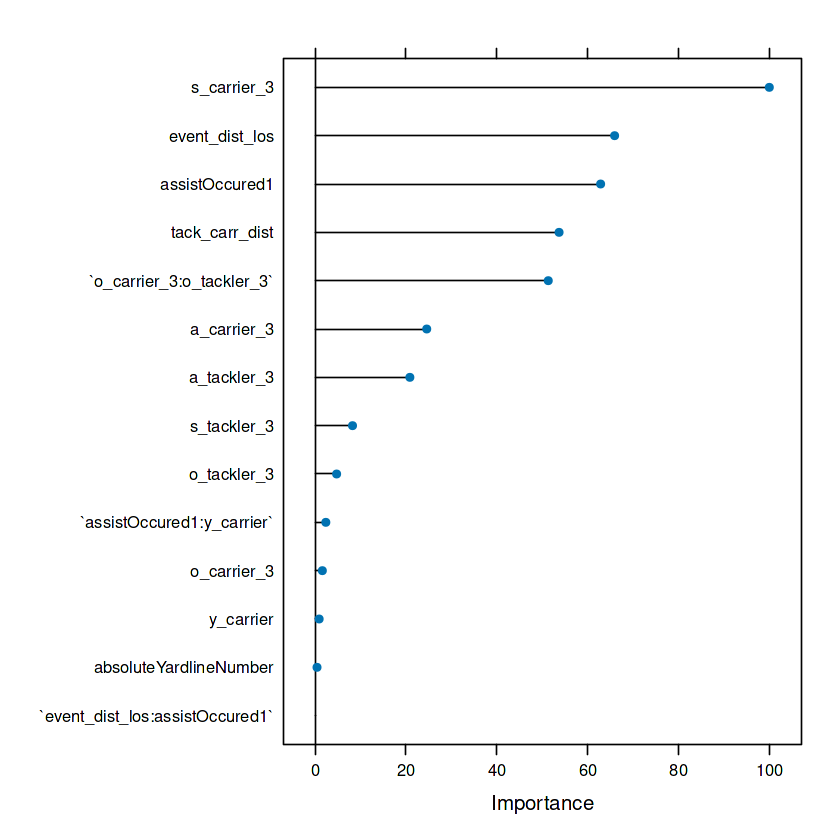

In [110]:
raw_model_data <- all_data_final %>%
    select(c('gameId', 'playId', 'a_tackler_3', 'a_carrier_3' ,'absoluteYardlineNumber','event_dist_los', 'y_carrier','assistOccured','s_carrier_3','o_carrier_3','s_tackler_3','o_tackler_3', 'tackleOccured', 'tack_carr_dist', 'yardDiff')) %>%
    drop_na() 

preproc <- preProcess(raw_model_data, method = c("center", "scale"))
model_data <- predict(preproc, raw_model_data)
model_data$assistOccured <- factor(raw_model_data$assistOccured)
model_data$pass <- raw_model_data$pass
model_data$gameId <- raw_model_data$gameId
model_data$playId <- raw_model_data$playId


data_split = createDataPartition(model_data$tackleOccured, p = 0.8, list = FALSE)
train_data = model_data[data_split, ]
test_data = model_data[-data_split, ]

default_rf_mod_pca = train(
  form = tackleOccured ~ a_tackler_3 + a_carrier_3 + event_dist_los*assistOccured + y_carrier*assistOccured + s_carrier_3 + o_carrier_3*o_tackler_3 + s_tackler_3 + a_tackler_3 + absoluteYardlineNumber + tack_carr_dist,
  data = train_data,
  trControl = trainControl(method = "cv", number = 5, classProbs = TRUE),
  method = "glm"
)


print(default_rf_mod_pca)

# summarize results
confusion_matrix_rf_pca <- caret::confusionMatrix(predict(default_rf_mod_pca, newdata = test_data), test_data$tackleOccured)
print(confusion_matrix_rf_pca)

accuracy <- confusion_matrix_rf_pca$overall["Accuracy"]
print(paste("Accuracy:", accuracy))

roc <- pROC::roc(predict(default_rf_mod_pca, newdata = test_data), test_data$tackleOccured)
auc <- pROC::auc(roc)
plot(roc, main = paste("AUC:", auc))


f1_score <- MLmetrics::F1_Score(predict(default_rf_mod_pca, newdata = test_data), test_data$tackleOccured)
print(paste("F1 Score:", f1_score))


RFImpPCA <- varImp(default_rf_mod_pca)
plot(RFImpPCA)

default_rf_mod_pca_df <- data.frame(Model = "Random Forest with PCA",
                                    Training_Accuracy = mean(default_rf_mod_pca$results$Accuracy) ,
                                         Test_Accuracy = accuracy,
                                         AUC = auc,
                                         F1_Score = f1_score)


In [111]:
default_rf_mod_pca$finalModel


Call:  NULL

Coefficients:
                    (Intercept)                      a_tackler_3  
                       2.172807                        -0.155297  
                    a_carrier_3                   event_dist_los  
                      -0.181826                         0.661889  
                 assistOccured1                        y_carrier  
                      -1.170089                        -0.007390  
                    s_carrier_3                      o_carrier_3  
                      -1.124898                        -0.012552  
                    o_tackler_3                      s_tackler_3  
                       0.034769                        -0.087450  
         absoluteYardlineNumber                   tack_carr_dist  
                       0.003793                         0.763363  
`event_dist_los:assistOccured1`       `assistOccured1:y_carrier`  
                      -0.002402                         0.043918  
      `o_carrier_3:o_tackler_3`  


In [122]:


assist_plays <- subset(model_data, tackleOccured == 'MAKE' & assistOccured == 1)
assist_plays$assistOccured <- factor(assist_plays$assistOccured)
assist_plays$tackleProb <- predict(default_rf_mod_pca, newdata = assist_plays, type = "prob")
assist_plays$tackleProb <- assist_plays$tackleProb$`MAKE`

assist_plays_no_assist <- assist_plays
assist_plays_no_assist$assistOccured <- 0
assist_plays_no_assist$assistOccured <- factor(assist_plays_no_assist$assistOccured)

assist_plays$tackleProbna <- predict(default_rf_mod_pca, newdata = assist_plays_no_assist, type = "prob")
assist_plays$tackleProbna <- assist_plays$tackleProbna$`MAKE`
assist_plays$assistProbBonus <- assist_plays$tackleProb - assist_plays$tackleProbna


In [75]:
length(assist_plays$tackleOccured)

[1] 1437

In [123]:

assist_plays_top <- assist_plays %>%
arrange(assistProbBonus) 



In [96]:
assist_plays_no_assist <- assist_plays_no_assist %>%
arrange(tackleProb) 


In [124]:
assist_plays_top

gameId,playId,a_tackler_3,a_carrier_3,absoluteYardlineNumber,event_dist_los,y_carrier,assistOccured,s_carrier_3,o_carrier_3,s_tackler_3,o_tackler_3,tackleOccured,tack_carr_dist,yardDiff,tackleProb,tackleProbna,assistProbBonus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022102311,2675,-0.136713065,-0.80053805,-1.21743204,0.08006428,1.29186514,1,0.970184389,-1.7115090,1.44455933,1.2857891,MAKE,-0.6380573,-0.19708145,0.1445506,0.7572590,-0.6127084
2022091105,2042,1.829508502,1.11666621,1.18610755,0.18642004,1.00379293,1,0.403544144,-0.5157877,0.04776638,-1.5490545,MAKE,-0.7088770,-0.17332417,0.2599792,0.8013091,-0.5413299
2022101611,1572,0.598068697,-0.12047314,0.91029153,-1.22588553,-1.47213159,1,0.960498231,1.0153058,1.42535942,0.2457663,MAKE,-0.6919468,-0.10205235,0.1531930,0.6729145,-0.5197215
2022102303,3379,-0.395247389,-0.04089108,1.38311899,2.23191339,0.69626650,1,1.096104444,-0.8921475,1.24296034,1.5276037,MAKE,-0.6007727,-0.09526455,0.3655705,0.8784783,-0.5129078
2022100911,2421,1.155958553,0.45107077,1.10730297,0.55124503,-0.16795013,1,0.389014907,1.3623746,0.80136257,1.5531333,MAKE,-0.8105582,-3.72843068,0.3898134,0.8940377,-0.5042243
2022100909,1483,-0.102695391,-1.19121364,-1.49324806,1.19432638,1.09807111,1,1.377003027,0.7232804,1.68935809,1.0598468,MAKE,-0.2771915,-3.59267482,0.3114728,0.8123359,-0.5008631
2022101300,2129,0.468801535,-0.90182431,0.20105034,-0.52096944,0.02958510,1,0.112959403,-0.5509762,-1.01782824,0.7075949,MAKE,-0.4590649,-0.22083872,0.3137722,0.7728227,-0.4590505
2022110603,2654,-1.517830636,0.58853069,-0.15357026,0.02070292,-0.43731635,1,0.016097823,-1.2330239,0.24456538,-1.6369263,MAKE,-0.7571419,-0.28532275,0.4572698,0.9093782,-0.4521084
2022100211,308,-0.347622645,0.31361084,-1.25683433,2.23438678,0.48825591,1,0.975027468,1.3115576,0.71976298,-1.6414202,MAKE,-0.4727246,-0.26835327,0.2463284,0.6949191,-0.4485908


Warning message:
“Unknown or uninitialised column: `pass`.”


[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:02:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

Setting levels: control = MISS, case = MAKE

Warning message in value[[3L]](cond):
“Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor.”
Setting direction: controls < cases



[1] "F1 Score: 0.699080157687254"


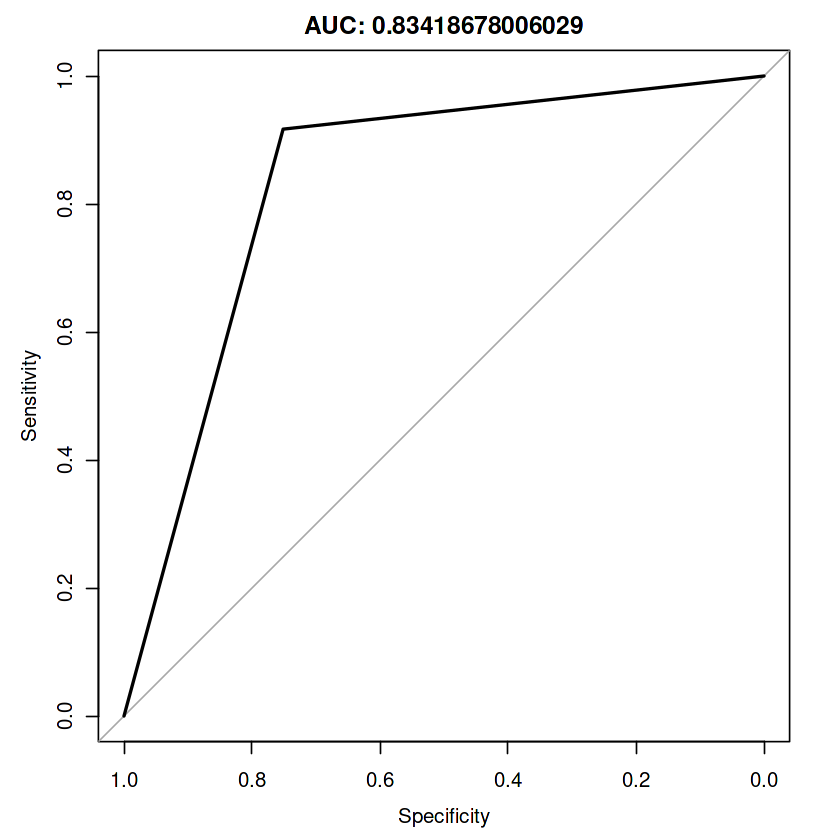

Warning message in mean.default(default_rf_mod_pca$results$Accuracy):
“argument is not numeric or logical: returning NA”


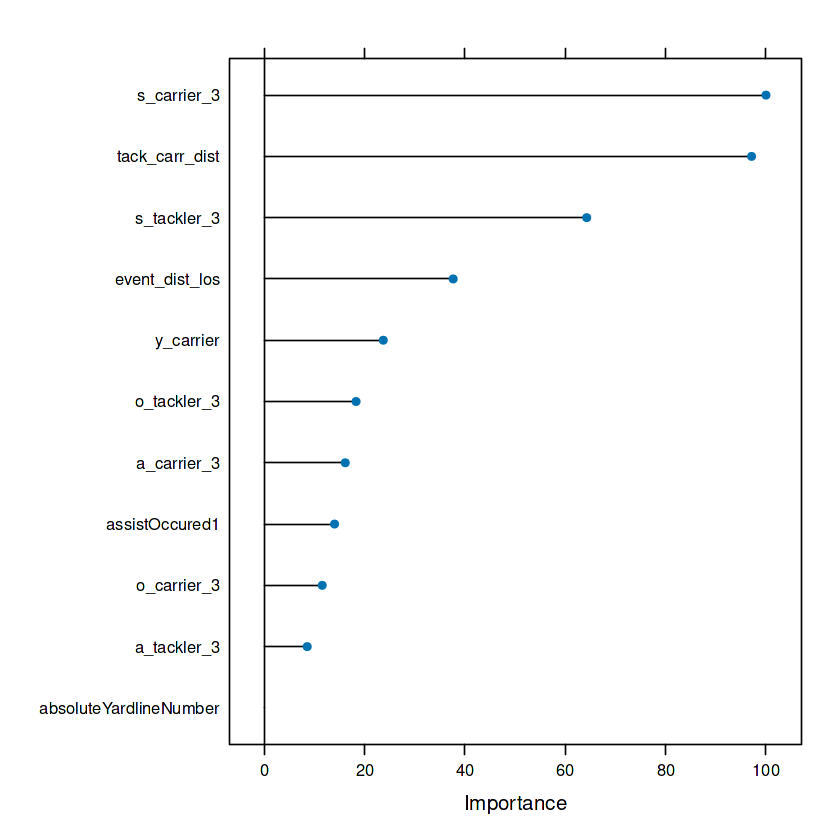

In [197]:
raw_model_data <- all_data_final %>%
    select(c('gameId', 'playId', 'nlfId_tackler', 'a_tackler_3', 'a_carrier_3' ,'absoluteYardlineNumber','event_dist_los', 'y_carrier','assistOccured','s_carrier_3','o_carrier_3','s_tackler_3','o_tackler_3', 'tackleOccured', 'tack_carr_dist', 'yardDiff')) %>%
    drop_na() 

preproc <- preProcess(raw_model_data, method = c("center", "scale"))
model_data <- predict(preproc, raw_model_data)
model_data$assistOccured <- factor(raw_model_data$assistOccured)
model_data$pass <- raw_model_data$pass
model_data$gameId <- raw_model_data$gameId
model_data$playId <- raw_model_data$playId
model_data$nlfId_tackler <- raw_model_data$nlfId_tackler


data_split = createDataPartition(model_data$tackleOccured, p = 0.8, list = FALSE)
train_data = model_data[data_split, ]
test_data = model_data[-data_split, ]

tackleprob = train(
  form = tackleOccured ~ a_carrier_3 + a_tackler_3 + event_dist_los+ assistOccured + y_carrier + s_carrier_3 + o_carrier_3 + o_tackler_3 + s_tackler_3 + a_tackler_3 + absoluteYardlineNumber + tack_carr_dist,
  data = train_data,
  trControl = trainControl(method = "cv", number = 5, classProbs = TRUE),
  method = "xgbTree"
)


print(tackleprob)

# summarize results
confusion_matrix_rf_pca <- caret::confusionMatrix(predict(tackleprob, newdata = test_data), test_data$tackleOccured)
print(confusion_matrix_rf_pca)

accuracy <- confusion_matrix_rf_pca$overall["Accuracy"]
print(paste("Accuracy:", accuracy))

roc <- pROC::roc(predict(tackleprob, newdata = test_data), test_data$tackleOccured)
auc <- pROC::auc(roc)
plot(roc, main = paste("AUC:", auc))


f1_score <- MLmetrics::F1_Score(predict(tackleprob, newdata = test_data), test_data$tackleOccured)
print(paste("F1 Score:", f1_score))


RFImpPCA <- varImp(tackleprob)
plot(RFImpPCA)

default_rf_mod_pca_df <- data.frame(Model = "Random Forest with PCA",
                                    Training_Accuracy = mean(default_rf_mod_pca$results$Accuracy) ,
                                         Test_Accuracy = accuracy,
                                         AUC = auc,
                                         F1_Score = f1_score)

In [198]:
model_data$probability <- predict(tackleprob, newdata = model_data, type = 'prob' )
model_data$tackle_resids <- ifelse(model_data$tackleOccured == 'MISS',0 - model_data$probability$`MAKE`,1 -model_data$probability$`MAKE`)

In [191]:
write.csv(model_data, 'individual_tackles.csv')

In [199]:

players_df$nflId_tracker <- players_df$nflId

sum_and_avg_tackles <- model_data %>%
  filter(tackleOccured == "MAKE") %>%
  group_by(nlfId_tackler) %>%
  summarise(
    totalTacklesOE = sum(tackle_resids),
    avgTackleOE = mean(tackle_resids)
  ) %>%
    left_join(players_df, by = "nlfId_tackler")



In [200]:
write.csv(sum_and_avg_tackles, 'average_sum_tackles.csv')

In [96]:
saveRDS(default_rf_mod_pca, "probability_model.rda")



In [97]:
write.csv(model_data, "model_data.csv")

In [88]:
table(model_data$tackleOccured)


MISS MAKE 
2035 8228 

Warning message in train.default(x, y, weights = w, ...):
“cannnot compute class probabilities for regression”


[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:25:15] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

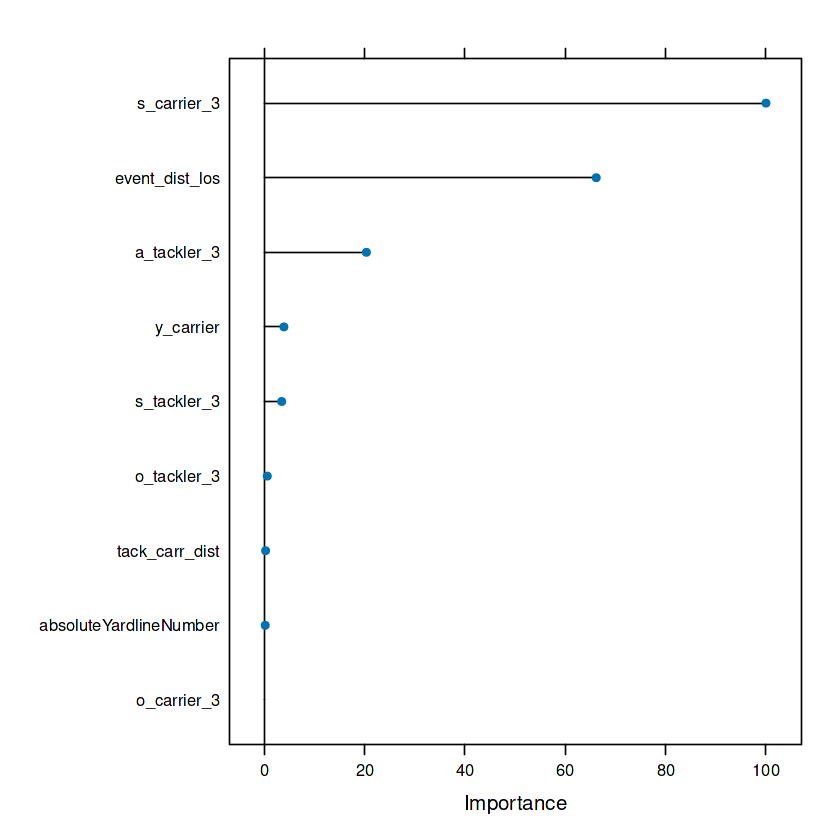

In [160]:
model_data <- all_data_final %>%
    select(c('event_dist_los','gameId', 'playId', 'nlfId_tackler','a_tackler_3', 'a_carrier_3' ,'absoluteYardlineNumber','event_dist_los', 'y_carrier','assistOccured','s_carrier_3','o_carrier_3','s_tackler_3','o_tackler_3', 'tackleOccured', 'tack_carr_dist', 'yardDiff')) %>%
    drop_na() 

missedTackleData <- subset(model_data, tackleOccured == 'MISS')

data_split = createDataPartition(missedTackleData$yardDiff, p = 0.8, list = FALSE)
train_data = model_data[data_split, ]
test_data = model_data[-data_split, ]

default_rf_mod_pca = train(
  form = yardDiff ~ event_dist_los + y_carrier + s_carrier_3 + o_carrier_3 + o_tackler_3 + s_tackler_3 + a_tackler_3 + absoluteYardlineNumber + tack_carr_dist,
  data = train_data,
  trControl = trainControl(method = "cv", number = 5, classProbs = TRUE),
  preProc = c("center","scale"),
  method = "xgbTree"
)


print(default_rf_mod_pca)
predictions <- predict(default_rf_mod_pca, newdata = test_data)
MAE <- mean(abs(predictions - test_data$yardDiff)) # Mean Absolute Error
MSE <- mean((predictions - test_data$yardDiff)^2) # Mean Squared Error
RMSE <- sqrt(MSE) # Root Mean Squared Error
R_squared <- cor(predictions, test_data$yardDiff)^2 # R-squared value

RFImp <- varImp(default_rf_mod_pca)
plot(RFImp)



In [129]:

predictions <- predict(default_rf_mod_pca, newdata = test_data)
MAE <- mean(abs(predictions - test_data$yardDiff)) # Mean Absolute Error
MSE <- mean((predictions - test_data$yardDiff)^2) # Mean Squared Error
RMSE <- sqrt(MSE) # Root Mean Squared Error
R_squared <- cor(predictions, test_data$yardDiff)^2 # R-squared value

print(MAE)
print(MSE)
print(RMSE)
print(R_squared)

[1] 2.825503
[1] 42.25567
[1] 6.500436
[1] 0.00132179


In [204]:
model_data$expYardsSaved  <- predict(default_rf_mod_pca, newdata = model_data)

sum_and_avg <- model_data %>%
  filter(tackleOccured == "MAKE") %>%
  group_by(nlfId_tackler) %>%
  summarise(
    totalExpYardsSaved = sum(expYardsSaved),
    averageExpYardsSaved = mean(expYardsSaved)
  )

In [139]:
write.csv(sum_and_avg, 'player_yards_saved.csv')
write.csv(model_data, 'individual_play_yards_saved.csv')

In [138]:
sum_and_avg

nlfId_tackler,totalExpYardsSaved,averageExpYardsSaved
<dbl>,<dbl>,<dbl>
33131,3.7367819,0.53382598
35449,0.5734390,0.14335976
35452,3.3734229,0.84335572
35454,-0.3898853,-0.12996176
35459,5.5356367,0.27678183
35466,-1.0800065,-0.04909121
35470,3.2508149,0.65016297
35493,4.5737070,0.57171338
35522,0.5806189,0.29030947


In [141]:
players_df$nlfId_tackler <- players_df$nflId

In [142]:
sum_and_avg <- left_join(sum_and_avg, players_df, by = "nlfId_tackler")

In [153]:
write.csv(model_data, 'individual_play_yards_saved.csv')

In [146]:
full_plays$nflId <- full_plays$tacklerId

model_data$gameId <- factor(model_data$gameId)
model_data$playId <- factor(model_data$playId)
model_data <- left_join(model_data, full_plays, c("gameId", "playId", "nlfId_tackler") )

In [151]:
model_data$gameId <- factor(model_data$gameId)
model_data$playId <- factor(model_data$playId)
model_data <- left_join(model_data, full_plays, c("gameId", "playId", "nlfId_tackler") )

In [152]:
model_data

gameId,playId,nlfId_tackler,a_tackler_3,a_carrier_3,absoluteYardlineNumber.x,event_dist_los,y_carrier,assistOccured,s_carrier_3,⋯,assist,forcedFumble,pff_missedTackle,height,weight,birthDate,collegeName,position,displayName,nflId_tackle
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>
2022090800,56,43294,4.15,2.73,15,5.67,7.10,0,0.52,⋯,0,0,0,6-1,208,1994-10-24,Florida State,CB,Jalen Ramsey,43294
2022090800,80,53532,2.76,2.58,21,5.90,15.82,0,6.89,⋯,0,0,0,6-2,230,NA,South Carolina,ILB,Ernest Jones,53532
2022090800,101,42816,4.01,4.38,28,5.31,13.40,0,5.75,⋯,0,0,0,5-11,184,1991-08-29,Oregon,CB,Troy Hill,42816
2022090800,122,38577,5.60,2.25,35,5.11,20.76,0,4.78,⋯,0,0,0,6-0,242,1990-06-27,Utah State,ILB,Bobby Wagner,38577
2022090800,167,43298,3.08,0.16,43,11.39,-2.68,0,6.61,⋯,0,0,0,6-5,240,1992-09-08,Georgia,DE,Leonard Floyd,43298
2022090800,191,52492,3.06,2.71,55,1.19,15.57,1,4.21,⋯,0,0,0,6-5,252,1998-08-25,Alabama,OLB,Terrell Lewis,52492
2022090800,212,38577,3.03,3.20,56,8.70,23.28,0,6.59,⋯,0,0,0,6-0,242,1990-06-27,Utah State,ILB,Bobby Wagner,38577
2022090800,299,53459,3.56,3.65,27,5.27,-3.65,0,1.30,⋯,0,0,0,6-7,253,NA,Miami,DE,Gregory Rousseau,53459
2022090800,343,46085,1.53,1.83,27,1.33,-2.35,0,4.38,⋯,0,0,0,6-5,250,1998-05-02,Virginia Tech,ILB,Tremaine Edmunds,46085


In [182]:
x_values <- seq(-5, 50, by = 0.25)
y_values <- seq(-26.75, 26.75, by = 0.25)



grid_data <- expand.grid(event_dist_los = x_values, y_carrier = y_values)
grid_data$s_carrier_3 <- median(model_data$s_carrier_3)
grid_data$o_carrier_3 <- median(model_data$o_carrier_3)
grid_data$o_tackler_3 <- median(model_data$o_tackler_3)
grid_data$s_tackler_3 <- median(model_data$s_tackler_3)
grid_data$a_tackler_3 <- median(model_data$a_tackler_3)
grid_data$absoluteYardlineNumber <- median(model_data$absoluteYardlineNumber)
grid_data$tack_carr_dist<- median(model_data$tack_carr_dist)


grid_data$expYardsSaved  <- predict(default_rf_mod_pca, newdata = grid_data)


In [176]:
grid_data

event_dist_los,y_carrier,s_carrier_3,o_carrier_3,o_tackler_3,s_tackler_3,a_tackler_3,absoluteYardlineNumber,tack_carr_dist,expYardsSaved
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-5.00,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-4.75,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-4.50,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-4.25,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-4.00,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-3.75,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-3.50,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-3.25,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707
-3.00,-26.75,3.836761,178.7951,180.8767,3.490486,2.820944,46.8975,1.098815,1.1552707


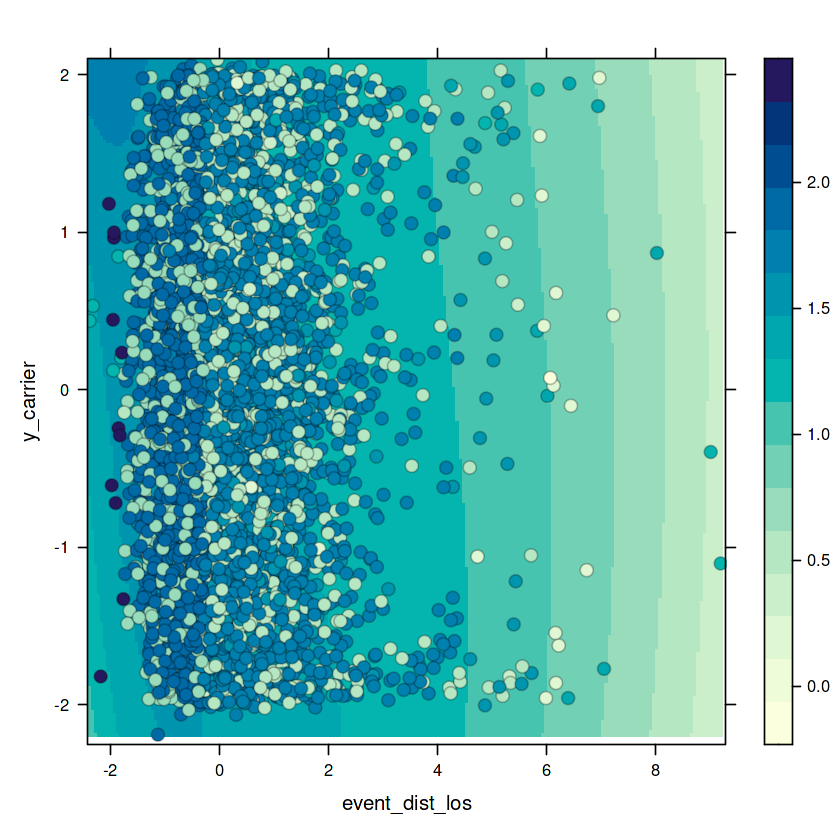

In [209]:
tackle_data <- subset(model_data, tackleOccured == "MAKE")
 
 
# showing data points on the same color scale 
levelplot(expYardsSaved ~ event_dist_los * y_carrier, tackle_data, 
          panel = panel.levelplot.points, cex = 1.2
    ) + 
    latticeExtra::layer_(panel.2dsmoother(..., n = 200))

In [208]:
# Saving the ggplot as a PDF file
ggsave("tacklePlot.pdf", plot = expTacklePlot)

Saving 12.5 x 6.67 in image


ERROR: Error in UseMethod("grid.draw"): no applicable method for 'grid.draw' applied to an object of class "trellis"


In [202]:


# Create a sample matrix (replace this with your own data)
# Here's a small example matrix for demonstration purposes
set.seed(21)


# Create a heatmap using ggplot2's geom_tile()
ggplot(missedTackleData, aes(x = event_dist_los, y = y_carrier, fill = expYardsSaved)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +  # Adjust colors as needed
  labs(x = "Columns", y = "Rows", title = "Heatmap Example using ggplot2")

ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'expYardsSaved' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, erro

In [158]:
model_data

gameId,playId,nlfId_tackler,a_tackler_3,a_carrier_3,absoluteYardlineNumber.x,event_dist_los,y_carrier,assistOccured,s_carrier_3,⋯,assist,forcedFumble,pff_missedTackle,height,weight,birthDate,collegeName,position,displayName,nflId_tackle
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>
2022091500,741,47984,2.60,2.51,70,38.73,-21.40,0,4.70,⋯,0,0,0,5-11,188,1997-02-17,South Carolina,CB,Rashad Fenton,47984
2022101607,3355,38588,4.24,1.74,34,44.63,-4.27,0,7.26,⋯,0,0,0,6-1,233,1990-01-23,Nebraska,ILB,Lavonte David,38588
2022101607,3596,47793,1.09,1.43,72,9.14,-20.07,0,4.18,⋯,0,0,0,5-11,233,1998-07-18,Michigan,ILB,Devin Bush,47793
2022102304,2327,44830,2.00,2.25,66,7.51,-2.17,0,4.79,⋯,0,0,0,5-11,185,1995-09-18,Southern California,CB,Adoree' Jackson,44830
2022101607,3596,45395,2.18,2.67,72,3.92,-14.44,0,4.56,⋯,0,0,1,5-10,190,1993-07-13,Memphis,CB,Arthur Maulet,45395
